# Simple example of ICM decompostion of P, T, V gates

In [1]:
from qutip import QubitCircuit
from qutip.qip.icm import Icm, pauli_tracking, decompose_SNOT, decompose_toffoli
import numpy as np

# Create a circuit with a mix of CNOT and P gate

In [2]:
qcircuit = QubitCircuit(1, reverse_states=False)
# qcircuit.add_gate("CNOT", targets= [0], controls=[1])
# qcircuit.add_gate("CNOT", targets= [1], controls=[0])

# Add P gate, RX(pi/2)
qcircuit.add_gate("SNOT", targets=[0])

# Add additional CNOT in the end
# qcircuit.add_gate("CNOT", targets= [1], controls=[0])

# Visualize circuit
decompose_SNOT(qcircuit).png

# Initialize the ICM model and visualize the ICM circuit (No Pauli tracking)

P
V
P


/Users/shahnawaz/dev/qutip/qutip/qip/circuit.py:153: UserWarning: Unknown gate Z
  warnings.warn("Unknown gate %s" % name)
/Users/shahnawaz/dev/qutip/qutip/qip/circuit.py:153: UserWarning: Unknown gate XZ
  warnings.warn("Unknown gate %s" % name)


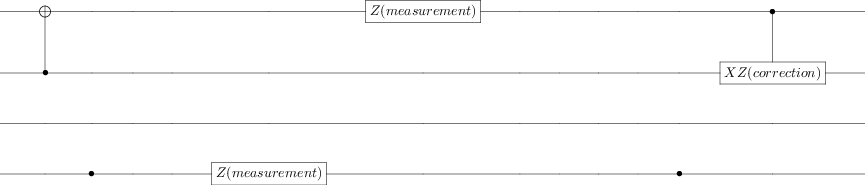

In [3]:
# Initialize the ICM model and convert to icm
model = Icm(qcircuit)

dc = model.decompose_gates()
icm_circuit = pauli_tracking(model.to_icm())
# Display
icm_circuit.png


# Apply Pauli tracking (needs more work on the measurement sequence)

In [ ]:
# Apply Pauli tracking to move ancilla to begining and corrections to end
pauli_tracked = pauli_tracking(icm_circuit)
# Display Pauli tracked circuit (This needs more work to get the correct measurement sequence)
pauli_tracked.png

# T gate with selective source and selective destination

In [ ]:
# T gate implementation (RZ(pi/4))
qcircuit2 = QubitCircuit(2, reverse_states=False)
qcircuit2.add_gate("CNOT", targets=[0], controls = [1])
qcircuit2.add_gate("CNOT", targets=[1], controls = [0])
qcircuit2.add_gate("RZ", arg_value = np.pi / 4, arg_label=r"\pi/4", targets=[1])
qcircuit2.add_gate("CNOT", targets=[1], controls = [0])

qcircuit2.png

# Icm version of T gate between CNOTs

In [ ]:
icm_model = Icm(qcircuit2)
icm_circuit = icm_model.to_icm()

icm_circuit.png

# Apply Pauli tracking (trivial)

In [ ]:
# Visualize with Pauli tracking
pauli_tracked_T = pauli_tracking(icm_circuit)

pauli_tracked_T.png